In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import glob
import os

from scipy.signal import argrelextrema

In [2]:
path = 'C:/Users/Jonathan/Jupiter/GITHUB/V,S,n,NxN_1500,1000,10,3x3'
#'C:/Users/Jonathan/Jupiter/Prueba01/V,S,n,NxN_1500,1000,10,5x5_Vb13'

In [3]:
sim = np.matrix(pd.read_csv(f'{path}/tVI.csv'))#f'{path}sim_0_iv.csv'

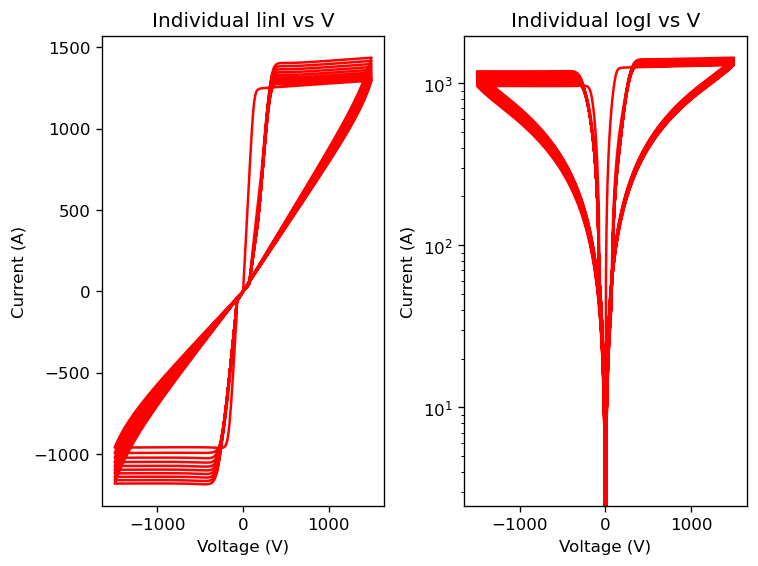

In [4]:
plt.figure(dpi=120)

plt.subplot(1, 2, 1)
plt.title("Individual linI vs V") 
plt.xlabel("Voltage (V)") 
plt.ylabel("Current (A)") 
plt.plot(sim[:,1],sim[:,2],"r") #,"ob")

plt.subplot(1, 2, 2)
plt.title("Individual logI vs V") 
plt.xlabel("Voltage (V)") 
plt.ylabel("Current (A)")
# plt.ylim(1e-7, 5e-3)
plt.semilogy(sim[:,1],np.abs(sim[:,2]),"r") # sim[1:len(sim),2]

plt.tight_layout(pad=1.0)
plt.savefig(f'{path}/Lin-Log-IV')
plt.show()


In [5]:
# R = np.zeros((len(sim)-2,1))

# for i in range(1,len(sim)-1):
  #   R[i-1] = -1*(sim[i,1] - sim[i-1,1]) / (sim[i,2] - sim[i-1,2])
    
#####################################################################################################################

# LF = np.zeros((len(sim),2)) # len(sim)-3,2
RL = np.zeros((len(sim),1)) # len(sim)-4,1

# To-solve: export the uncertainty by activating some additional options 
# it will also imply to rescale LF

for j in range(10,len(sim)-10):
    RL[j] = np.polyfit(np.array(sim[j-10:j+10,2]).ravel(), np.array(sim[j-10:j+10,1]).ravel(), 1)[0]
    # LF[j,:] = np.polyfit(np.array(sim[j-10:j+10,1]).ravel(), np.array(-1*sim[j-10:j+10,2]).ravel(), 1)
    # LF[j,0]: slope
    # LF[j,1]: intersect

for j in range(0,10):
    RL[j] = np.polyfit(np.array(sim[j:j+10,2]).ravel(), np.array(sim[j:j+10,1]).ravel(), 1)[0]

for j in range(len(sim)-10,len(sim)):
    RL[j] = np.polyfit(np.array(sim[j-10:j,2]).ravel(), np.array(sim[j-10:j,1]).ravel(), 1)[0]


In [6]:
min = argrelextrema(np.abs(sim[:,1]), np.less)
#print(min)

Min = np.insert(min[0], 0, 0, axis=None)
#print(Min)
#Min = np.insert(Min, 5, 2221, axis=None) # I had to add a zero by hand 'cause there was a plateau where a minimum was expected
#print(Min)
Min = np.append(Min, len(sim[:,1])-3, axis=None)
# print(Min)

# print(RL[Min])

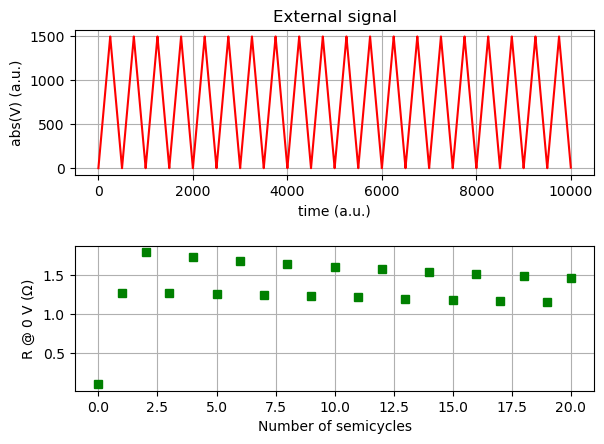

In [7]:
plt.figure(dpi=100)

# plt.rc('figure', figsize=(10,5))
# plt.rc('axes', labelsize=8)
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('legend', fontsize=8)

plt.subplot(2, 1, 1)
plt.title("External signal") 
plt.ylabel("abs(V) (a.u.)")
plt.xlabel("time (a.u.)")  
plt.plot(sim[:,0], np.abs(sim[:,1]), "r")
plt.grid()

plt.subplot(2, 1, 2)
#plt.title("Resistive states - linear fit method")
plt.ylabel("R @ 0 V ($\Omega$)") 
plt.xlabel("Number of semicycles") 
#plt.ylim(2000, 800000)
plt.plot(np.arange(0, len(RL[Min])), RL[Min], "sg")
plt.grid()

plt.tight_layout(pad=2.0)
plt.savefig(f'{path}/ResistiveStates0V_convolution')#f'{path}ResistiveStates0V'
plt.show()

In [8]:
RS = np.zeros(len(Min))

for i in range(0,len(Min)):
    RS[i] = RL[Min[i]]

In [9]:
from numpy import savetxt
savetxt(f'{path}/Remnant-resistance-state.csv', RS, delimiter=',')#f'{path}RS_4x4_convolution.csv'

In [10]:
DeltaRL = np.zeros(len(Min)-1)
DeltaRLrel = np.zeros(len(Min)-1)

for i in range(0,len(Min)-2):
    DeltaRL[i] = RL[Min[i+1]]-RL[Min[i]]
    DeltaRLrel[i] = (RL[Min[i+2]]-RL[Min[i]])/RL[Min[i]]

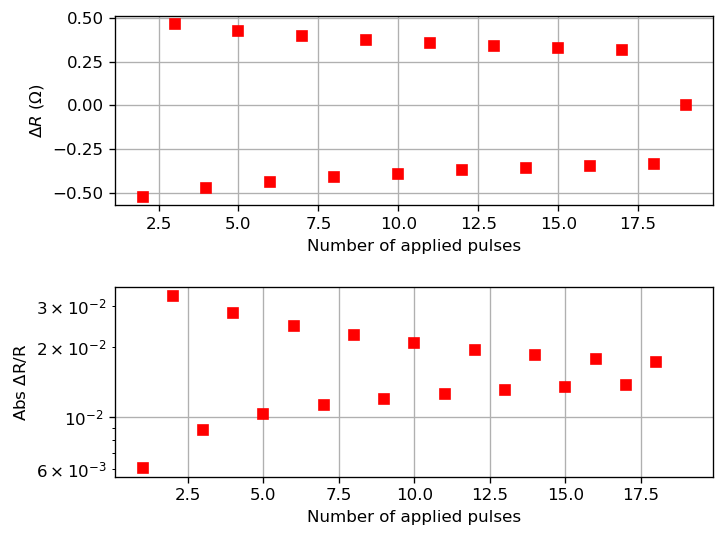

In [11]:
plt.figure(dpi=120)

plt.subplot(2, 1, 1)
#plt.title("$R_{init}$ = $R_{OFF}$ - cumulative RESET pulses") 
plt.ylabel("$\Delta R$ ($\Omega$)")
plt.xlabel("Number of applied pulses")
#plt.ylim(-400000, 50000)
plt.plot(np.arange(2, len(DeltaRL)), DeltaRL[2:len(DeltaRL)], "sr")
plt.grid()

plt.subplot(2, 1, 2)
plt.ylabel("Abs $\Delta$R/R")
plt.xlabel("Number of applied pulses")
#plt.ylim(0.001, 1e7)
plt.semilogy(np.arange(1, len(DeltaRLrel)), np.abs(DeltaRLrel[1:len(DeltaRLrel)]), "sr")
plt.grid()

plt.savefig(f'{path}/DeltaR')
plt.tight_layout(pad=2.0)

plt.show()